## **Gráfico de Densidade Populacional**

#### Este notebook apresenta o código para plotar um gráfico de densidade populacionais utilizando o módulo IBGE do DadosAbertosBrasil.

In [1]:
# Importar packages
from DadosAbertosBrasil import ibge
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Encontrar a tabela que precisamos

In [2]:
# Procurar id da tabela 'População residente estimada'
ibge.Agregados(index=True).filtrar(pesquisa='CD', contendo='População residente').head(10)

,agregado_nome,pesquisa_id,pesquisa_nome
agregado_id,,,
135,"População residente por religião, cor ou raça ...",CD,Censo Demográfico
136,"População residente, por cor ou raça",CD,Censo Demográfico
137,"População residente, por religião",CD,Censo Demográfico
138,"População residente por grupos de idade, tipo ...",CD,Censo Demográfico
139,"População residente por grupos de idade, relig...",CD,Censo Demográfico
140,"População residente por grupos de idade, cor o...",CD,Censo Demográfico
200,"População residente, por sexo, situação e grup...",CD,Censo Demográfico
201,População residente de 5 anos ou mais por alfa...,CD,Censo Demográfico
202,"População residente, por sexo e situação do do...",CD,Censo Demográfico


#### 2. Antes de iniciarmos o SIDRA, precisamos identificar com quais parâmetros vamos alimenta-lo.

In [3]:
# Obter metadados da tabela '202 - População residente'
meta = ibge.Metadados(202)

In [4]:
# Períodos disponíveis
meta.periodos

{'frequencia': 'anual', 'inicio': 1970, 'fim': 2010}

In [5]:
# Variáveis disponíveis
meta.variaveis

[{'id': 93,
  'nome': 'População residente',
  'unidade': 'Pessoas',
  'sumarizacao': ['nivelTerritorial']},
 {'id': 1000093,
  'nome': 'População residente - percentual do total geral',
  'unidade': '%',
  'sumarizacao': []}]

In [6]:
# Localidades disponíveis
meta.localidades

{'Administrativo': ['N15',
  'N102',
  'N1',
  'N10',
  'N2',
  'N8',
  'N9',
  'N6',
  'N14',
  'N7',
  'N13',
  'N11',
  'N3'],
 'Especial': [],
 'IBGE': []}

In [7]:
# Classificações e categorias disponíveis
meta.classificacoes

[{'id': 2,
  'nome': 'Sexo',
  'sumarizacao': {'status': True, 'excecao': []},
  'categorias': [{'id': 0, 'nome': 'Total', 'unidade': None, 'nivel': 0},
   {'id': 4, 'nome': 'Homens', 'unidade': None, 'nivel': 1},
   {'id': 5, 'nome': 'Mulheres', 'unidade': None, 'nivel': 1}]},
 {'id': 1,
  'nome': 'Situação do domicílio',
  'sumarizacao': {'status': True, 'excecao': []},
  'categorias': [{'id': 0, 'nome': 'Total', 'unidade': None, 'nivel': 0},
   {'id': 1, 'nome': 'Urbana', 'unidade': None, 'nivel': 1},
   {'id': 2, 'nome': 'Rural', 'unidade': None, 'nivel': 1}]}]

#### 3. Agora podemos criar o objeto SIDRA com os parâmetros que escolhermos:
- **Agregado** = 202 (População residente, por sexo e situação do domicílio)
- **Período** = 2010 (Último Censo Demográfico)
- **Variáveis** = 93 (População residente)
- **Localidades** = {'N10': 'all'} (Todos os distritos)
- **Classificações** = {1:0 (Sitação do domicílio: Total), 2:0 (Sexo: Total)}

In [8]:
# Criar objeto SIDRA, alimenta-lo com os parâmetros encontrados e rodar a query
populacao = ibge.Sidra(agregado=202, periodos=2010, variaveis=93, classificacoes={1:0, 2:0}, localidades={'N10': 'all'}).rodar()

#### Quantos distritos foram encontrados?

In [9]:
# Quantidade de distritos encontrados
qtde_dist = len(populacao[0]['resultados'][0]['series'])
qtde_dist

10278

#### 4. Criar um DataFrame contendo todas os distritos e suas respectivas populações

In [10]:
# Navegar por todas as séries capturando a população do distrito
pop = []
for i in range(qtde_dist):
    
    # Ignorar entradas inválidas
    try:
        a = populacao[0]['resultados'][0]['series'][i]['localidade']['id']
        b = int(populacao[0]['resultados'][0]['series'][i]['serie']['2010'])
        pop.append([a,b])
    except:
        pass
    
# Formatar DataFrame de população por distrito
pop = pd.DataFrame(pop, columns=['distrito', 'populacao'])
pop.distrito = pop.distrito.astype(int)

# Visualizar DataFrame
pop.head(10)

,distrito,populacao
0,110001505,18667
1,110001515,687
2,110001520,823
3,110001525,1370
4,110001530,659
5,110001535,2186
6,110002305,90353
7,110003105,6313
8,110004905,64948
9,110004910,13626


#### 5. Obter as coordenadas de todos os distritos

In [11]:
# Obter coordenadas
coo = ibge.coordenadas()
coo.head(10)

,GM_PONTO,ID,CD_GEOCODIGO,TIPO,CD_GEOCODBA,NM_BAIRRO,CD_GEOCODSD,NM_SUBDISTRITO,CD_GEOCODDS,NM_DISTRITO,...,NM_MESO,NM_UF,CD_NIVEL,CD_CATEGORIA,NM_CATEGORIA,NM_LOCALIDADE,LONG,LAT,ALT,GM_PONTO_sk
0,NaN,1,110001505000001,URBANO,1.100015e+11,Redondo,11000150500,NaN,110001505,ALTA FLORESTA D'OESTE,...,LESTE RONDONIENSE,RONDÔNIA,1,5,CIDADE,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,337.735719,1J6+^YP=gnhf
1,NaN,2,110001515000001,URBANO,NaN,NaN,11000151500,NaN,110001515,FILADÉLFIA D'OESTE,...,LESTE RONDONIENSE,RONDÔNIA,2,15,VILA,FILADÉLFIA D'OESTE,-62.043898,-12.437239,215.244429,1J6+gStX@d?>
2,NaN,3,110001520000001,URBANO,NaN,NaN,11000152000,NaN,110001520,IZIDOLÂNDIA,...,LESTE RONDONIENSE,RONDÔNIA,2,20,VILA,IZIDOLÂNDIA,-62.175549,-12.601415,181.044807,1J6+gwlc:Gtp
3,NaN,4,110001525000001,URBANO,NaN,NaN,11000152500,NaN,110001525,NOVA GEASE D'OESTE,...,LESTE RONDONIENSE,RONDÔNIA,2,25,VILA,NOVA GEASE D'OESTE,-62.318650,-11.919792,191.576571,1J6+^nhO?byf
4,NaN,5,110001530000001,URBANO,NaN,NaN,11000153000,NaN,110001530,ROLIM DE MOURA DO GUAPORÉ,...,LESTE RONDONIENSE,RONDÔNIA,2,30,VILA,ROLIM DE MOURA DO GUAPORÉ,-62.276812,-13.079806,157.285277,1J6+Hn4dy6Y-
5,NaN,6,110001535000001,URBANO,NaN,NaN,11000153500,NaN,110001535,SANTO ANTÔNIO D'OESTE,...,LESTE RONDONIENSE,RONDÔNIA,2,35,VILA,SANTO ANTÔNIO D'OESTE,-62.104428,-12.089439,407.707855,1J6+g2mLy)Tf
6,NaN,7,110002305000001,URBANO,NaN,NaN,11000230500,NaN,110002305,ARIQUEMES,...,LESTE RONDONIENSE,RONDÔNIA,1,5,CIDADE,ARIQUEMES,-63.033269,-9.908463,138.688981,1J6{7^Xi:vOp
7,NaN,8,110003105000001,URBANO,NaN,NaN,11000310500,NaN,110003105,CABIXI,...,LESTE RONDONIENSE,RONDÔNIA,1,5,CIDADE,CABIXI,-60.544314,-13.499763,236.063160,1J6+O_Y;K@z>
8,NaN,9,110003105000008,RURAL,NaN,NaN,11000310500,NaN,110003105,CABIXI,...,LESTE RONDONIENSE,RONDÔNIA,3,1,POVOADO,PLANALTO SÃO LUIZ,-60.415206,-13.374447,264.992801,1J6+O+1hOWX-
9,NaN,10,110004905000001,URBANO,1.100049e+11,Princesa Isabel,11000490500,NaN,110004905,CACOAL,...,LESTE RONDONIENSE,RONDÔNIA,1,5,CIDADE,CACOAL,-61.442944,-11.433865,177.453547,1J6+_2d21Tif


#### 6. Unificar os DataFrames de população e de coordenadas

In [12]:
# Left join (pop <- coo)
df = pop.merge(coo[['LONG', 'LAT', 'ALT', 'CD_GEOCODDS']], how='left', left_on='distrito', right_on='CD_GEOCODDS').drop(columns=['CD_GEOCODDS'])
df.head(10)

,distrito,populacao,LONG,LAT,ALT
0,110001505,18667,-61.999824,-11.935540,337.735719
1,110001515,687,-62.043898,-12.437239,215.244429
2,110001520,823,-62.175549,-12.601415,181.044807
3,110001525,1370,-62.318650,-11.919792,191.576571
4,110001530,659,-62.276812,-13.079806,157.285277
5,110001535,2186,-62.104428,-12.089439,407.707855
6,110002305,90353,-63.033269,-9.908463,138.688981
7,110003105,6313,-60.544314,-13.499763,236.063160
8,110003105,6313,-60.415206,-13.374447,264.992801
9,110004905,64948,-61.442944,-11.433865,177.453547


#### 7. Plottar gráfico

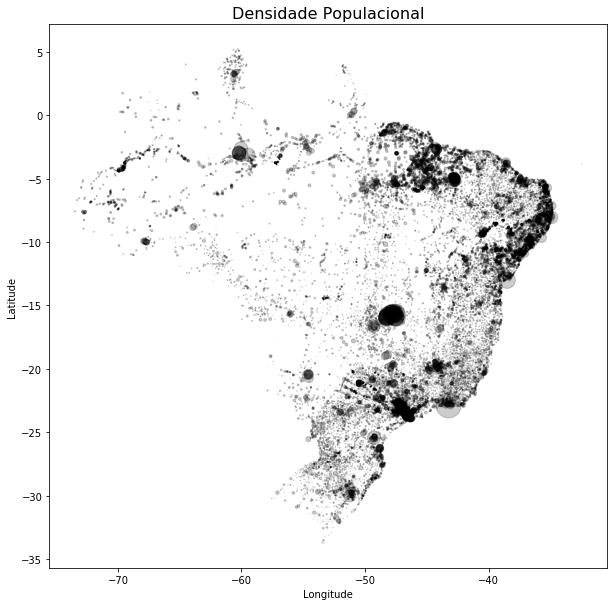

In [16]:
# Criar figura e definir tamanho
plt.figure(figsize=(10,10))

# Plotar longitude do eixo X, latitude no eixo Y, e população como tamanho do marker
plt.scatter(df.LONG, df.LAT, s=df.populacao/10000, alpha=0.2, color='black')

# Formatar labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Densidade Populacional', fontsize=16)
plt.show()